# New regimes of Josephson junction arrays

In [1]:
import JJArray as jja
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.sparse import bmat
from tqdm.notebook import tqdm

# Full Hamiltonian

In [2]:
N = 4
Ncut = 4

EC = np.full((N), 0.001)
EJ = np.full((N), 0.)
EJb = 10
ECb = 0.2
phi = 0.

H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)

# Setup of the system by symmetry sectors

Generate unitary transformations for each symmetry sector

In [3]:
%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  6561


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1665 [00:00<?, ?it/s]

Sector 0= 1665


  0%|          | 0/1665 [00:00<?, ?it/s]

Sector 1= 1620


  0%|          | 0/1665 [00:00<?, ?it/s]

Sector 2= 1656


  0%|          | 0/1665 [00:00<?, ?it/s]

Sector 3= 1620
Sum of sector dimensions =  6561
CPU times: user 444 ms, sys: 27.6 ms, total: 472 ms
Wall time: 440 ms


In [4]:
scan = {}
ph_list = np.linspace(0,1,20)

for k in range(N):
    scan[k] = []

for ph in tqdm(ph_list):

    H = jja.H_array(ph, N , Ncut, EJ, EC, EJb, ECb)
    evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,4)
    for k in range(N):
        scan[k].append(symmetric_data[k][0])

  0%|          | 0/20 [00:00<?, ?it/s]

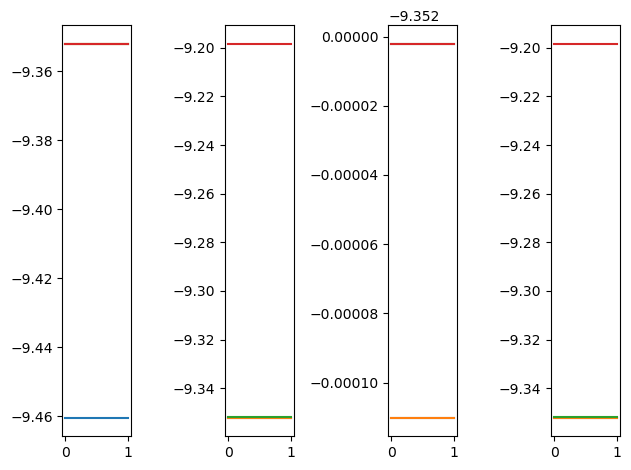

In [5]:
fig, ax = plt.subplots(1,N)

[ax[r].plot(ph_list,np.array(scan[r])) for r in range(N)];
# [ax[r].set_ylim([-10,-8]) for r in range(N)]
# [ax[r].set_xticks([]) for r in range(N)]

fig.tight_layout()

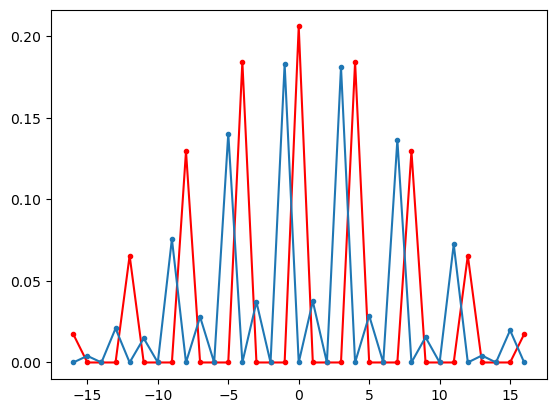

In [6]:
bs = jja.cartesian([np.arange(-Ncut,Ncut+1) for r in range(N)])
chrgs = np.array([np.sum(bs[r]) for r in range(len(bs))])

state = evecs[0]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

state = evecs[1]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'.-')

## Check block-diagonal form of the Hamiltonian in the symmetric basis (use small N, Ncut)

In [118]:
H_V = []
for i in tqdm(range(N)):
    tmp = []
    for j in range(N):
        tmp.append(V[i].dag()*H*V[j])
    H_V.append(tmp)
H_V = bmat(H_V)

  0%|          | 0/4 [00:00<?, ?it/s]

Text(0.5, 1.0, 'H in the symmetric basis')

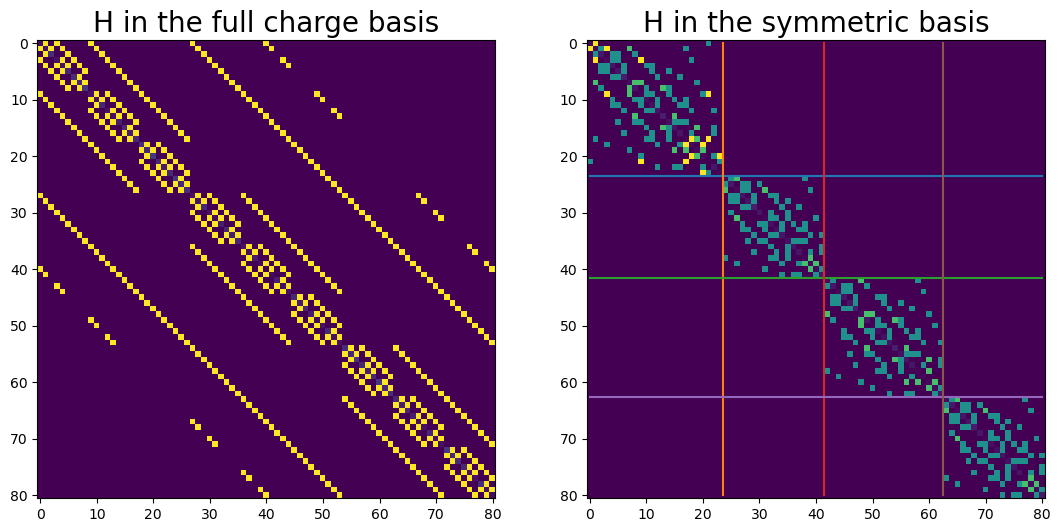

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,13))


ax1.imshow(np.abs(H.full()))
ax1.set_title('H in the full charge basis', size = 20)

ax2.imshow(np.abs(H_V.toarray()))

sm = V[0].shape[1]
for i in range(1,N):
    ax2.plot(np.arange(0,H.shape[0]),(sm-0.5)*np.ones(H.shape[0]))
    ax2.plot((sm-0.5)*np.ones(H.shape[0]),np.arange(0,H.shape[0]))
    sm = sm + V[i].shape[1]
    
ax2.set_title('H in the symmetric basis', size = 20)